In [1]:
import csky as cy
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy

In [2]:
emins = np.round(np.linspace(500,10000, 21 ), 2)
emaxs = np.round(np.logspace(4.6,8,21), 2)


In [3]:
#template pi0

In [4]:
def get_flux(template, minmax='min', nsigma=None):
    fluxs = []
    if minmax == 'min':
        emax = 1e8
        emins = np.round(np.linspace(500,10000, 21 ), 2)
        fluxs = []
        for emin in emins:
            base_dir = '/data/user/ssclafani/data/analyses/test_erange/{}/limited_Erange/'.format(template)
            if nsigma:
                if os.path.exists(base_dir + 'Emin_{:.4}_Emax_{:.4}_dp_{}.npy'.format(emin, emax, nsigma)):
                    sens = np.load(base_dir + 'Emin_{:.4}_Emax_{:.4}_dp_{}.npy'.format(emin, emax, nsigma), allow_pickle=True)[()]
                else:
                    print('Missing {:.4} {:.4}'.format(emin, emax))
            else:
                sens = np.load(base_dir + 'Emin_{:.4}_Emax_{:.4}_sens.npy'.format(emin, emax), allow_pickle=True)[()]
            if template == 'pi0':
                    flux = sens['fluxE2_100TeV']
                    fluxs.append(flux)
            else:
                flux = sens['model_norm']
                fluxs.append(flux)

    elif minmax == 'max':
        emin = 500.0
        emaxs = np.round(np.logspace(4.6,8,21), 2)
        fluxs = []
        for emax in emaxs:
            base_dir = '/data/user/ssclafani/data/analyses/erange_test/gp/{}/limited_Erange/'.format(template)
            if nsigma:
                if os.path.exists(base_dir + 'Emin_500.0_Emax_{:.4}_dp_{}.npy'.format(emin, emax, nsigma)):
                    sens = np.load(base_dir + 'Emin_500.0_Emax_{:.4}_dp_{}.npy'.format(emin, emax, nsigma), allow_pickle=True)[()]
                else:
                    print('Missing {:.4} {:.4}'.format(emin, emax))
            else:
            
                sens = np.load(base_dir + 'Emin_500.0_Emax_{:.4}_sens.npy'.format(emax), allow_pickle=True)[()]
            if template == 'pi0':
                flux = sens['fluxE2_100TeV']
                fluxs.append(flux)
            else:
                flux = sens['model_norm']
                fluxs.append(flux) 
    return fluxs

In [5]:
fluxs = get_flux('pi0', 'min')

5%: 1515.57
16%: 3596.10


Text(0, 0.5, 'flux')

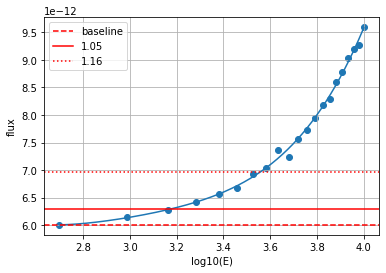

In [6]:
pi0sens = .6e-11
plt.scatter(np.log10(emins), fluxs)
p = np.polyfit(np.log10(emins), fluxs, 4)
predict = np.poly1d(p)

xspace = np.linspace(2.7,4,5000)
ypred = predict(xspace)
xvals = np.array([predict(x) / (pi0sens*1.05) for x in xspace])
idx = np.argmin(np.abs(1 - xvals))
val_5 = xspace[idx]

#print(predict(val_5)/(pi0sens*1.05))
print('5%: {:.2f}'.format(10**val_5))
plt.plot(xspace, ypred)
plt.axhline(pi0sens, c='r', ls='--', label='baseline')
plt.axhline(pi0sens*1.05, c='r', ls='-', label='1.05')
plt.axhline(pi0sens*1.16, c='r', ls=':', label='1.16')

xvals = np.array([predict(x) / (pi0sens*1.16) for x in xspace])
idx = np.argmin(np.abs(1 - xvals))
val_16 = xspace[idx]

#print(predict(val_16)/(pi0sens*1.16))
print('16%: {:.2f}'.format(10**val_16))
plt.xlabel('log10(E)')
plt.legend()
plt.grid()
plt.ylabel('flux')

In [7]:
fluxs = get_flux('pi0', 'max')

5%: 281896.72
16%: 98695.84


Text(0.5, 0, 'log10(E)')

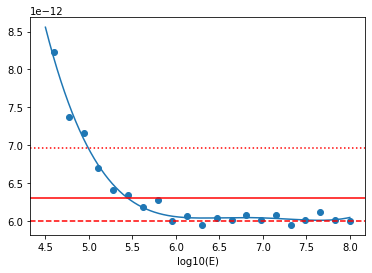

In [8]:
pi0sens = .6e-11
plt.scatter(np.log10(emaxs), fluxs)
p = np.polyfit(np.log10(emaxs), fluxs, 4)
predict = np.poly1d(p)

xspace = np.linspace(4.5,8,5000)
ypred = predict(xspace)
xvals = np.array([predict(x) / (pi0sens*1.05) for x in xspace])
idx = np.argmin(np.abs(1 - xvals))
val_5 = xspace[idx]

#print(predict(val_5)/(pi0sens*1.05))
print('5%: {:.2f}'.format(10**val_5))
plt.plot(xspace, ypred)
plt.axhline(pi0sens, c='r', ls='--')
plt.axhline(pi0sens*1.05, c='r', ls='-')
plt.axhline(pi0sens*1.16, c='r', ls=':')

ypred = predict(xspace)
xvals = np.array([predict(x) / (pi0sens*1.16) for x in xspace])
idx = np.argmin(np.abs(1 - xvals))
val_16 = xspace[idx]

#print(predict(val_16)/(pi0sens*1.16))
print('16%: {:.2f}'.format(10**val_16))
plt.xlabel('log10(E)')

In [9]:
fluxs = get_flux('kra5', 'min')

5%: 5219.44
16%: 10189.47


Text(0, 0.5, 'log10(E)')

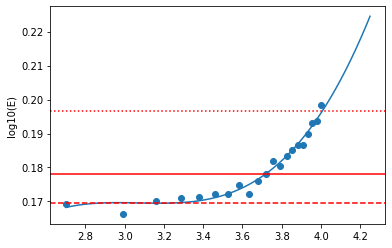

In [10]:
kra5sens = .1696
plt.scatter(np.log10(emins), fluxs)
p = np.polyfit(np.log10(emins), fluxs, 3)
predict = np.poly1d(p)

xspace = np.linspace(2.7,4.25,5000)
ypred = predict(xspace)
xvals = np.array([predict(x) / (kra5sens*1.05) for x in xspace])
idx = np.argmin(np.abs(1 - xvals))
val_5 = xspace[idx]

#print(predict(3.7)/(kra5sens*1.05))
print('5%: {:.2f}'.format(10**val_5))

plt.plot(xspace, ypred)
plt.axhline(kra5sens, c='r', ls='--')
plt.axhline(kra5sens*1.05, c='r', ls='-')
plt.axhline(kra5sens*1.16, c='r', ls=':')

ypred = predict(xspace)
xvals = np.array([predict(x) / (kra5sens*1.16) for x in xspace])
idx = np.argmin(np.abs(1 - xvals))
val_16 = xspace[idx]

#print(predict(4.02)/(kra5sens*1.16))
print('16%: {:.2f}'.format(10**val_16))
plt.ylabel('log10(E)')

In [11]:
fluxs = get_flux('kra5', 'max')

5%: 145088.28
16%: 80943.44


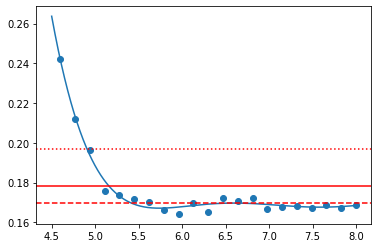

In [12]:
plt.scatter(np.log10(emaxs), fluxs)
p = np.polyfit(np.log10(emaxs), fluxs, 5)
predict = np.poly1d(p)

xspace = np.linspace(4.5,8,5000)
ypred = predict(xspace)
xvals = np.array([predict(x) / (kra5sens*1.05) for x in xspace])
idx = np.argmin(np.abs(1 - xvals))
val_5 = xspace[idx]

#print(predict(5.2)/(kra5sens*1.05))
print('5%: {:.2f}'.format(10**val_5))

plt.plot(xspace, ypred)
plt.axhline(kra5sens, c='r', ls='--')
plt.axhline(kra5sens*1.05, c='r', ls='-')
plt.axhline(kra5sens*1.16, c='r', ls=':')

xvals = np.array([predict(x) / (kra5sens*1.16) for x in xspace])
idx = np.argmin(np.abs(1 - xvals))
val_16 = xspace[idx]

#print(predict(4.02)/(kra5sens*1.16))
print('16%: {:.2f}'.format(10**val_16))


In [13]:
fluxs = get_flux('kra50', 'min')

5%: 6944.94
16%: 18207.57


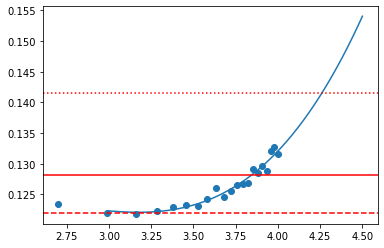

In [14]:
kra50sens = .122
plt.scatter(np.log10(emins), fluxs)
p = np.polyfit(np.log10(emins), fluxs, 3)
predict = np.poly1d(p)

xspace = np.linspace(3, 4.5,5000)
ypred = predict(xspace)
xvals = np.array([predict(x) / (kra50sens*1.05) for x in xspace])
idx = np.argmin(np.abs(1 - xvals))
val_5 = xspace[idx]

print('5%: {:.2f}'.format(10**val_5))
plt.plot(xspace, ypred)
plt.axhline(kra50sens, c='r', ls='--')
plt.axhline(kra50sens*1.05, c='r', ls='-')
plt.axhline(kra50sens*1.16, c='r', ls=':')

xvals = np.array([predict(x) / (kra50sens*1.16) for x in xspace])
idx = np.argmin(np.abs(1 - xvals))
val_16 = xspace[idx]

#print(predict(4.02)/(kra5sens*1.16))
print('16%: {:.2f}'.format(10**val_16))


In [15]:
fluxs = get_flux('kra50', 'max')

5%: 356706.04
16%: 162420.98


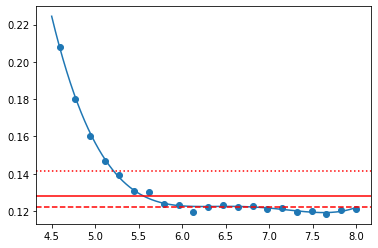

In [16]:
kra50sens = .122
xspace  = np.linspace(4.5,8,5000)
plt.scatter(np.log10(emaxs), fluxs)
p = np.polyfit(np.log10(emaxs), fluxs, 4)
predict = np.poly1d(p)

ypred = predict(xspace)
xvals = np.array([predict(x) / (kra50sens*1.05) for x in xspace])
idx = np.argmin(np.abs(1 - xvals))
val_5 = xspace[idx]

print('5%: {:.2f}'.format(10**val_5))
plt.plot(xspace, ypred)
plt.axhline(kra50sens, c='r', ls='--')
plt.axhline(kra50sens*1.05, c='r', ls='-')
plt.axhline(kra50sens*1.16, c='r', ls=':')

xvals = np.array([predict(x) / (kra50sens*1.16) for x in xspace])
idx = np.argmin(np.abs(1 - xvals))
val_16 = xspace[idx]
print('16%: {:.2f}'.format(10**val_16))


In [17]:
#5sigma


In [18]:
fluxs = get_flux('pi0', 'min', nsigma=5)

Missing 975.0 1e+08


1.0013205168252337
1778.2794100389228
1.009245797143991
3630.780547701014


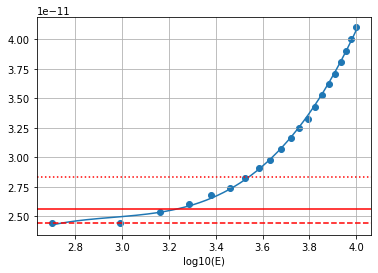

In [19]:
pi0sens = min(fluxs)
plt.scatter(np.log10(emins), fluxs)
p = np.polyfit(np.log10(emins), fluxs, 3)
predict = np.poly1d(p)
ypred = predict(np.linspace(2.7,4,1000))
print(predict(3.25)/(pi0sens*1.05))
print(10**3.25)
plt.plot(np.linspace(2.7,4,1000), ypred)
plt.axhline(pi0sens, c='r', ls='--')
plt.axhline(pi0sens*1.05, c='r', ls='-')
plt.axhline(pi0sens*1.16, c='r', ls=':')
print(predict(3.56)/(pi0sens*1.16))
print(10**3.56)
plt.xlabel('log10(E)')
plt.grid()

In [20]:
fluxs = get_flux('kra5', 'min', nsigma=5)

1.0099616250042949
5011.872336272725
1.0033631700836871
9549.92586021436


Text(0, 0.5, 'log10(E)')

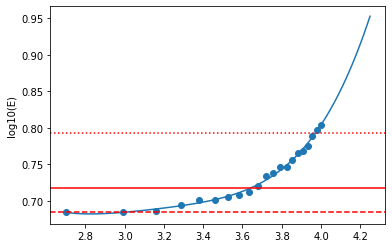

In [21]:
kra50sens = min(fluxs)
xrange  = np.linspace(2.7,4.25,100)
plt.scatter(np.log10(emins), fluxs)
p = np.polyfit(np.log10(emins), fluxs, 4)
predict = np.poly1d(p)
ypred = predict(xrange)
print(predict(3.7)/(kra50sens*1.05))
print(10**3.7)
plt.plot(xrange, ypred)
plt.axhline(kra50sens, c='r', ls='--')
plt.axhline(kra50sens*1.05, c='r', ls='-')
plt.axhline(kra50sens*1.16, c='r', ls=':')
print(predict(3.98)/(kra50sens*1.16))
print(10**3.98)
plt.ylabel('log10(E)')

In [22]:
fluxs = get_flux('kra50', 'min', nsigma=5)

1.000034801887316
6309.57344480193
1.0005109670296297
13182.567385564074


Text(0, 0.5, 'log10(E)')

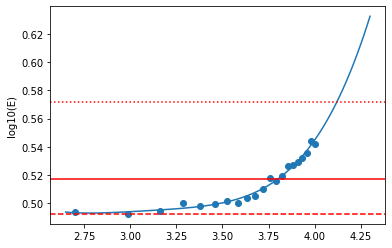

In [23]:
kra50sens = min(fluxs)
xrange  = np.linspace(2.65,4.3,100)
plt.scatter(np.log10(emins), fluxs)
p = np.polyfit(np.log10(emins), fluxs, 4)
predict = np.poly1d(p)
ypred = predict(xrange)
print(predict(3.8)/(kra50sens*1.05))
print(10**3.8)
plt.plot(xrange, ypred)
plt.axhline(kra50sens, c='r', ls='--')
plt.axhline(kra50sens*1.05, c='r', ls='-')
plt.axhline(kra50sens*1.16, c='r', ls=':')
print(predict(4.12)/(kra50sens*1.16))
print(10**4.12)
plt.ylabel('log10(E)')

In [24]:
fluxs = get_flux('kra5', 'max', nsigma=5)

Missing 500.0 3.981e+04


UnboundLocalError: local variable 'sens' referenced before assignment